In [1]:
import sys
sys.path.insert(0,'/home/olgan96/.env/lib/python3.11/site-packages/')

In [2]:
import umap.umap_ as umap

In [3]:
import matplotlib.pyplot as plt

/home/olgan96/.env/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [4]:
import pandas as pd

In [5]:
import seaborn as sns

In [6]:
df = pd.read_parquet('../../NO_BACKUP/lincs_2020/signature_response_features_r2_top0.7_final.parquet')

In [7]:
#df_genes = pd.read_parquet('../../NO_BACKUP/lincs_2020/genes_info.parquet')

In [8]:
#set(cols_expr_fp[2048:]) - set(df_genes['gene_id'].astype(str).values)

### Gene expression features

In [31]:
cols_expr = df.columns[2058:14385]

In [32]:
X = df[cols_expr].values

In [33]:
n = [5, 15, 30, 50, 80, 100, 200]

/home/olgan96/.env/lib/python3.11/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


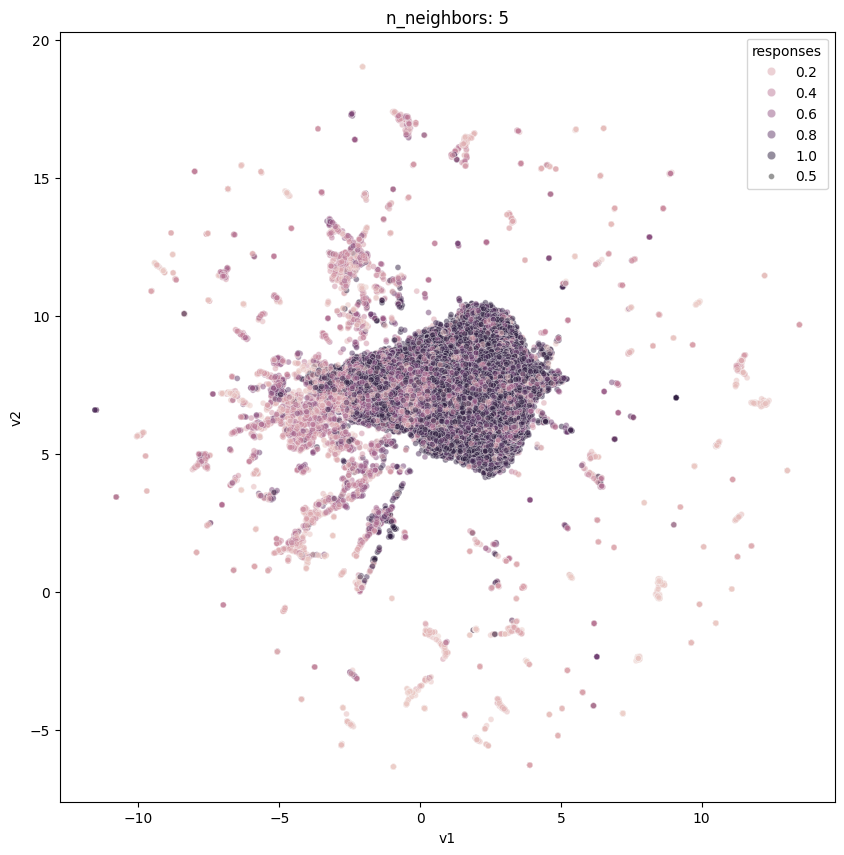

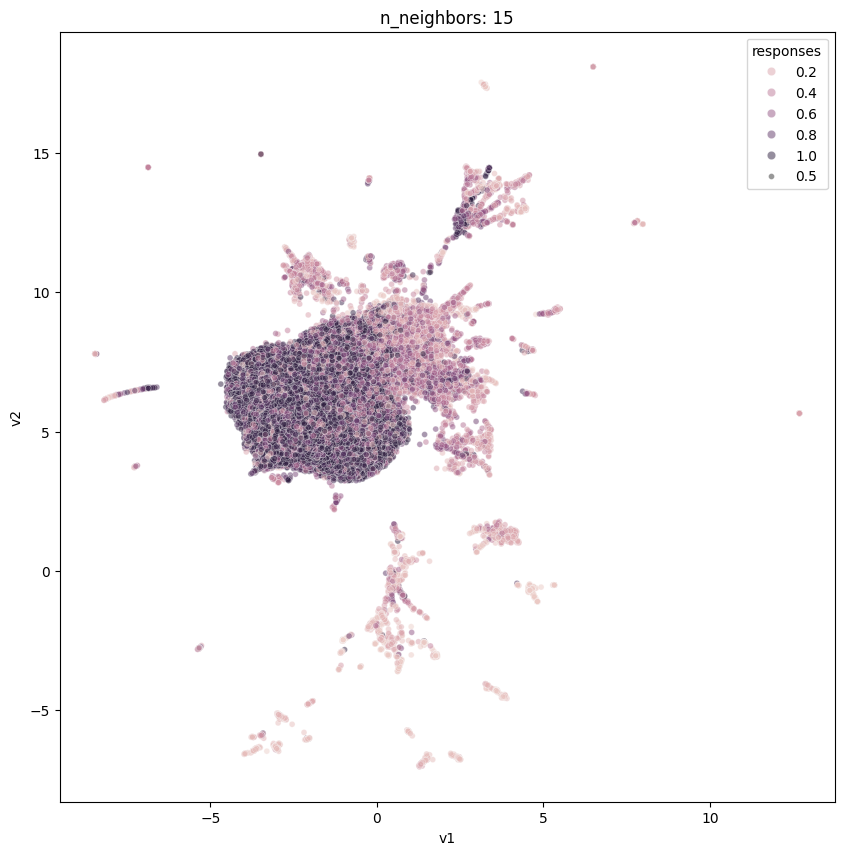

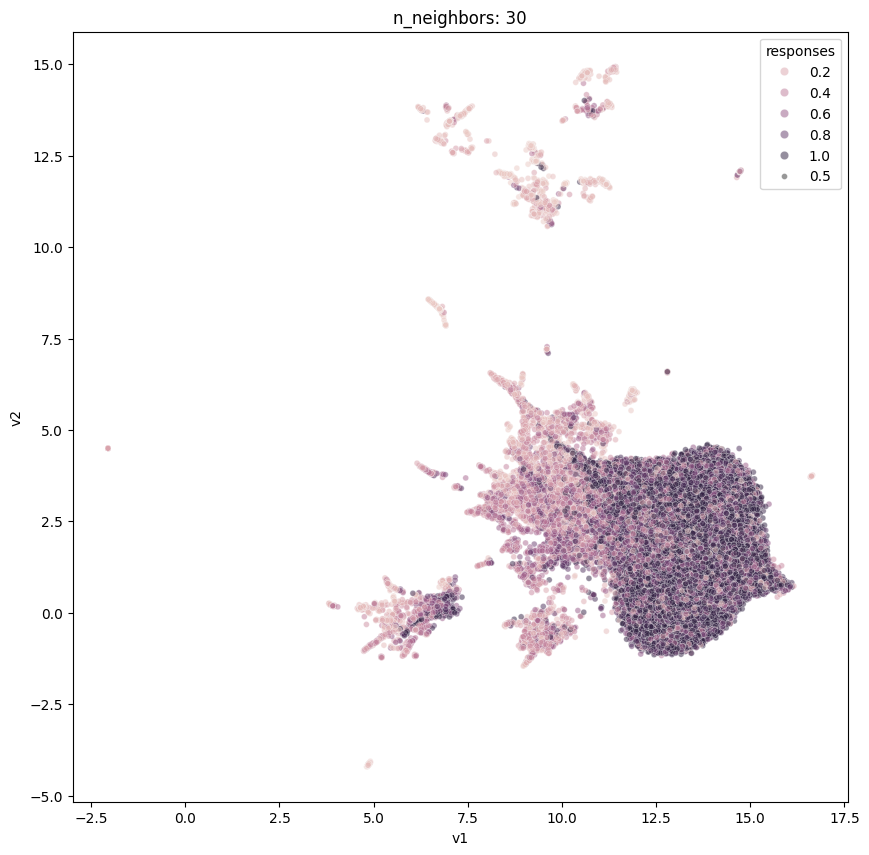

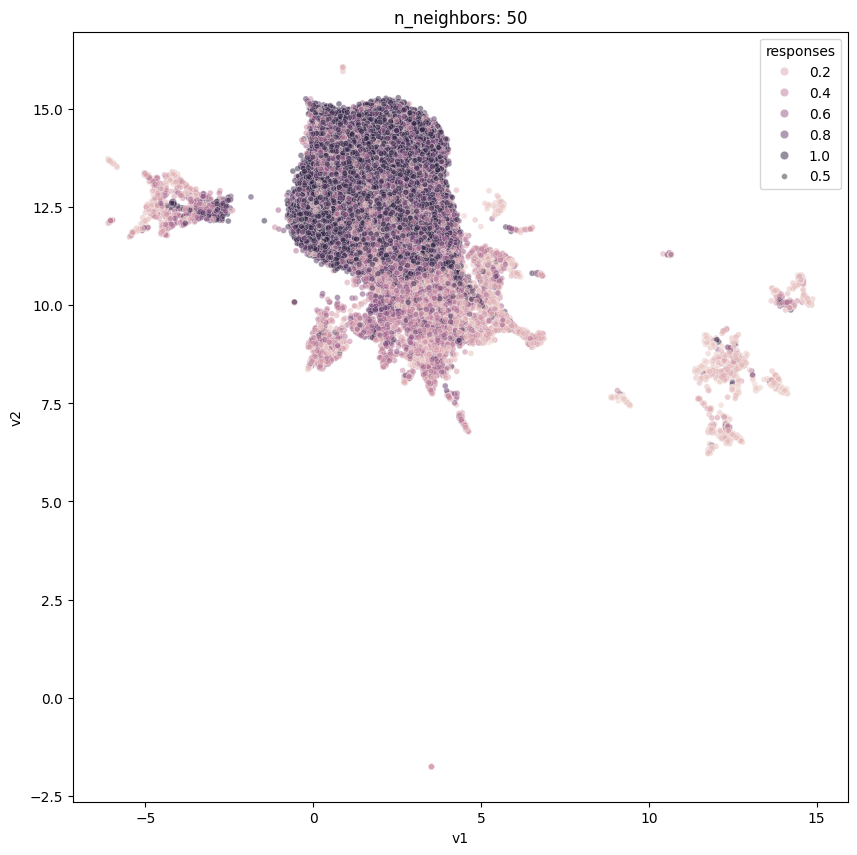

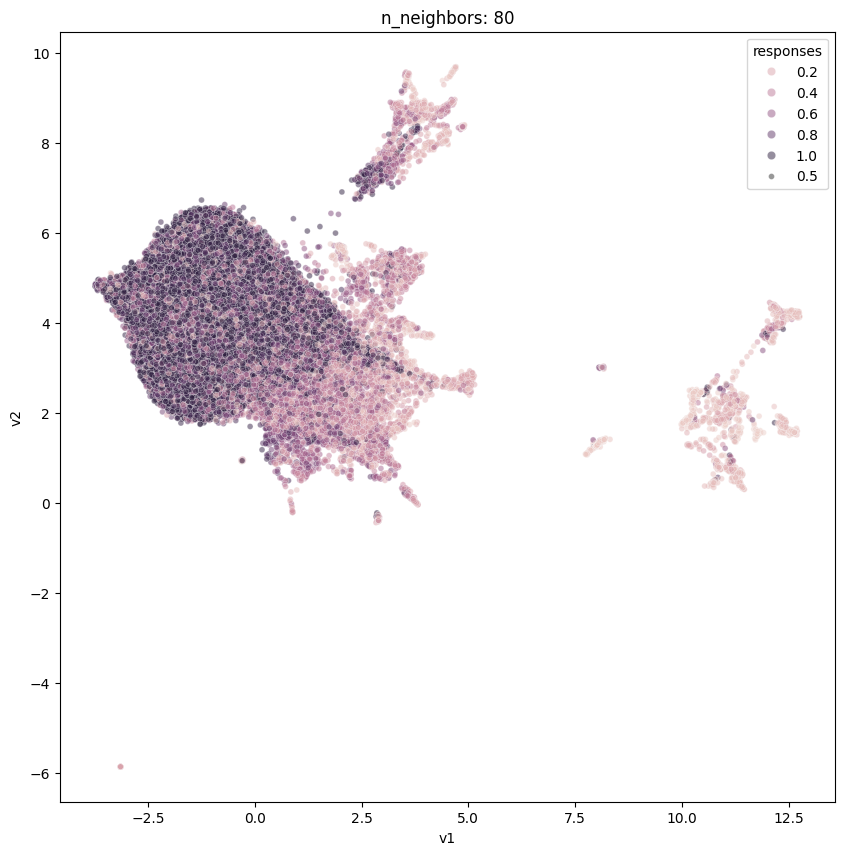

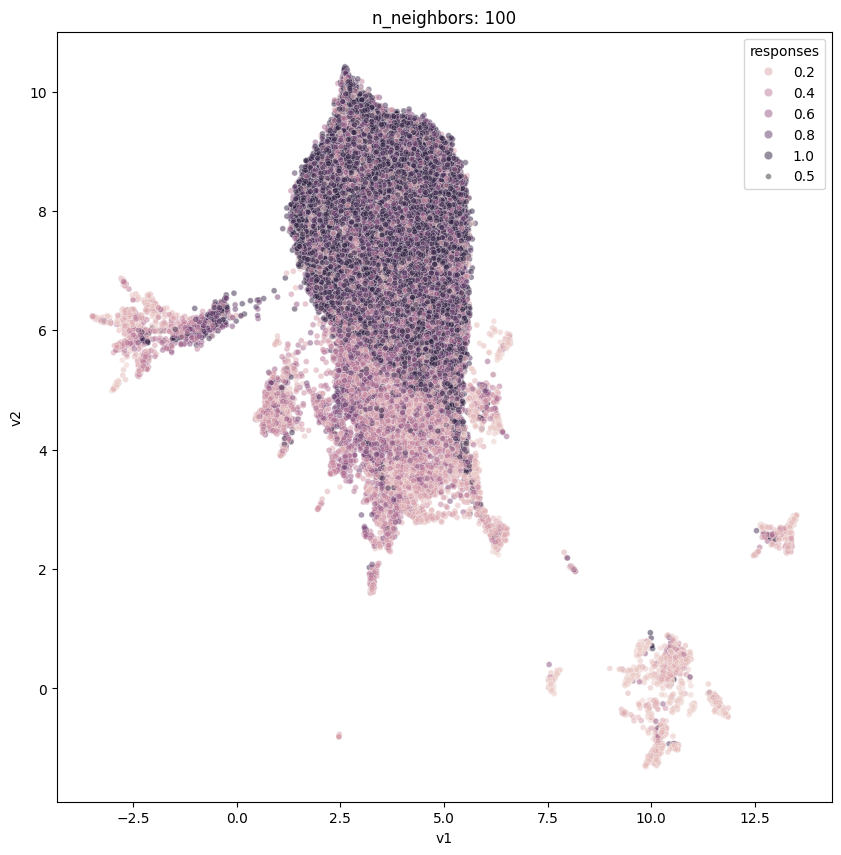

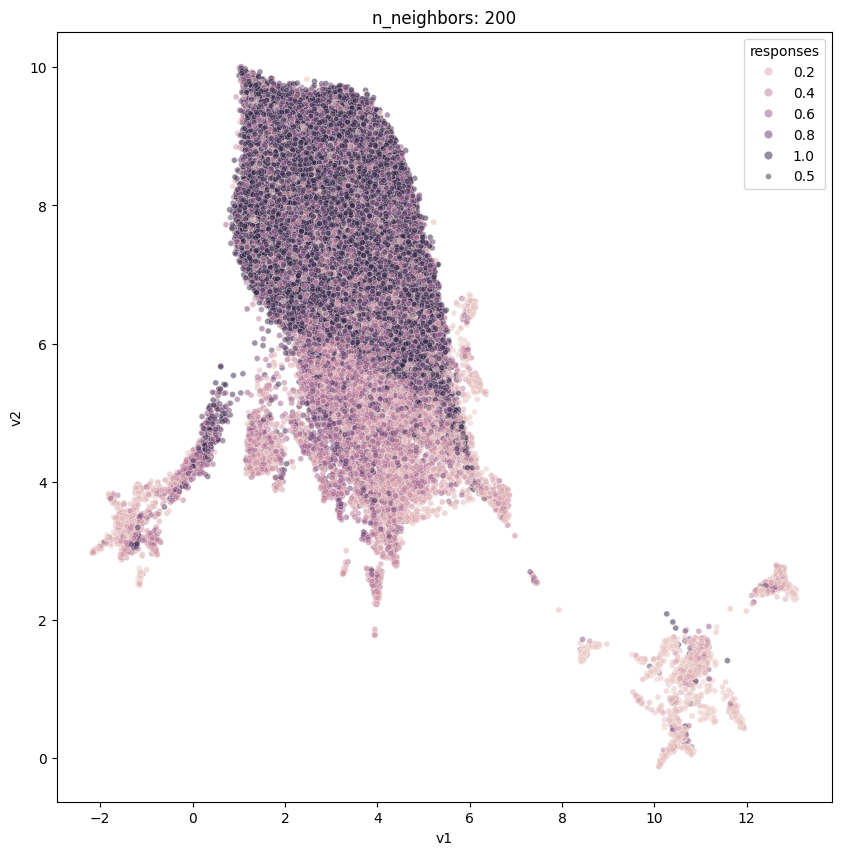

In [34]:
for n_i in n:
    reducer = umap.UMAP(n_neighbors=n_i)
    reducer.fit(X)
    X_new = reducer.transform(X)
    df['v1'] = X_new[:, 0]
    df['v2'] = X_new[:, 1]
    fig, ax = plt.subplots(figsize=(10, 10))
    plt.title('n_neighbors: '+ str(n_i))
    sns.scatterplot(data=df, x='v1', y='v2', hue='responses', size = 0.5, alpha=0.5)
    plt.show()